In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
len(df['quality'].unique())

6

In [7]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
df.duplicated().sum()

240

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated().sum()

0

In [12]:
X = df.drop('quality',axis=1)

In [13]:
y = df['quality']

In [14]:
from sklearn.model_selection import train_test_split,GridSearchCV

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [17]:
model

DecisionTreeClassifier()

In [18]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [19]:
y_predict = model.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_predict)

0.48997772828507796

In [22]:
grid_param={
    'criterion':['gini','entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best','random']

}

In [23]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model,param_grid=grid_param,cv=5)

In [24]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'min_samples_leaf': 9,
 'min_samples_split': 9,
 'splitter': 'random'}

In [26]:
model_with_best_params = DecisionTreeClassifier(
    criterion='gini',
    max_depth=5,
    min_samples_leaf=9,
    min_samples_split=8,
    splitter='random'
)

In [27]:
model_with_best_params.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=9, min_samples_split=8,
                       splitter='random')

In [28]:
y_prediction2=model_with_best_params.predict(X_test)

In [29]:
accuracy_score(y_test,y_prediction2)

0.5679287305122495

In [30]:
# These model is an overfitted model
model.score(X_train,y_train)

1.0

[Text(0.49718060189938396, 0.9705882352941176, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.23141523357289528, 0.9117647058823529, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.12260972792607804, 0.8529411764705882, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.06179414784394251, 0.7941176470588235, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.02053388090349076, 0.7352941176470589, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.008213552361396304, 0.6764705882352942, 'X[10] <= 9.125\ngini = 0.245\nsamples = 14\nvalue = [0, 2, 12, 0, 0, 0]'),
 Text(0.004106776180698152, 0.6176470588235294, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0]'),
 Text(0.012320328542094456, 0.6176470588235294, 'X[6] <= 43.0\ngini = 0.142\nsamples = 13\nvalue = [0, 1, 12, 0, 0, 0]'),
 Text(0.00821355

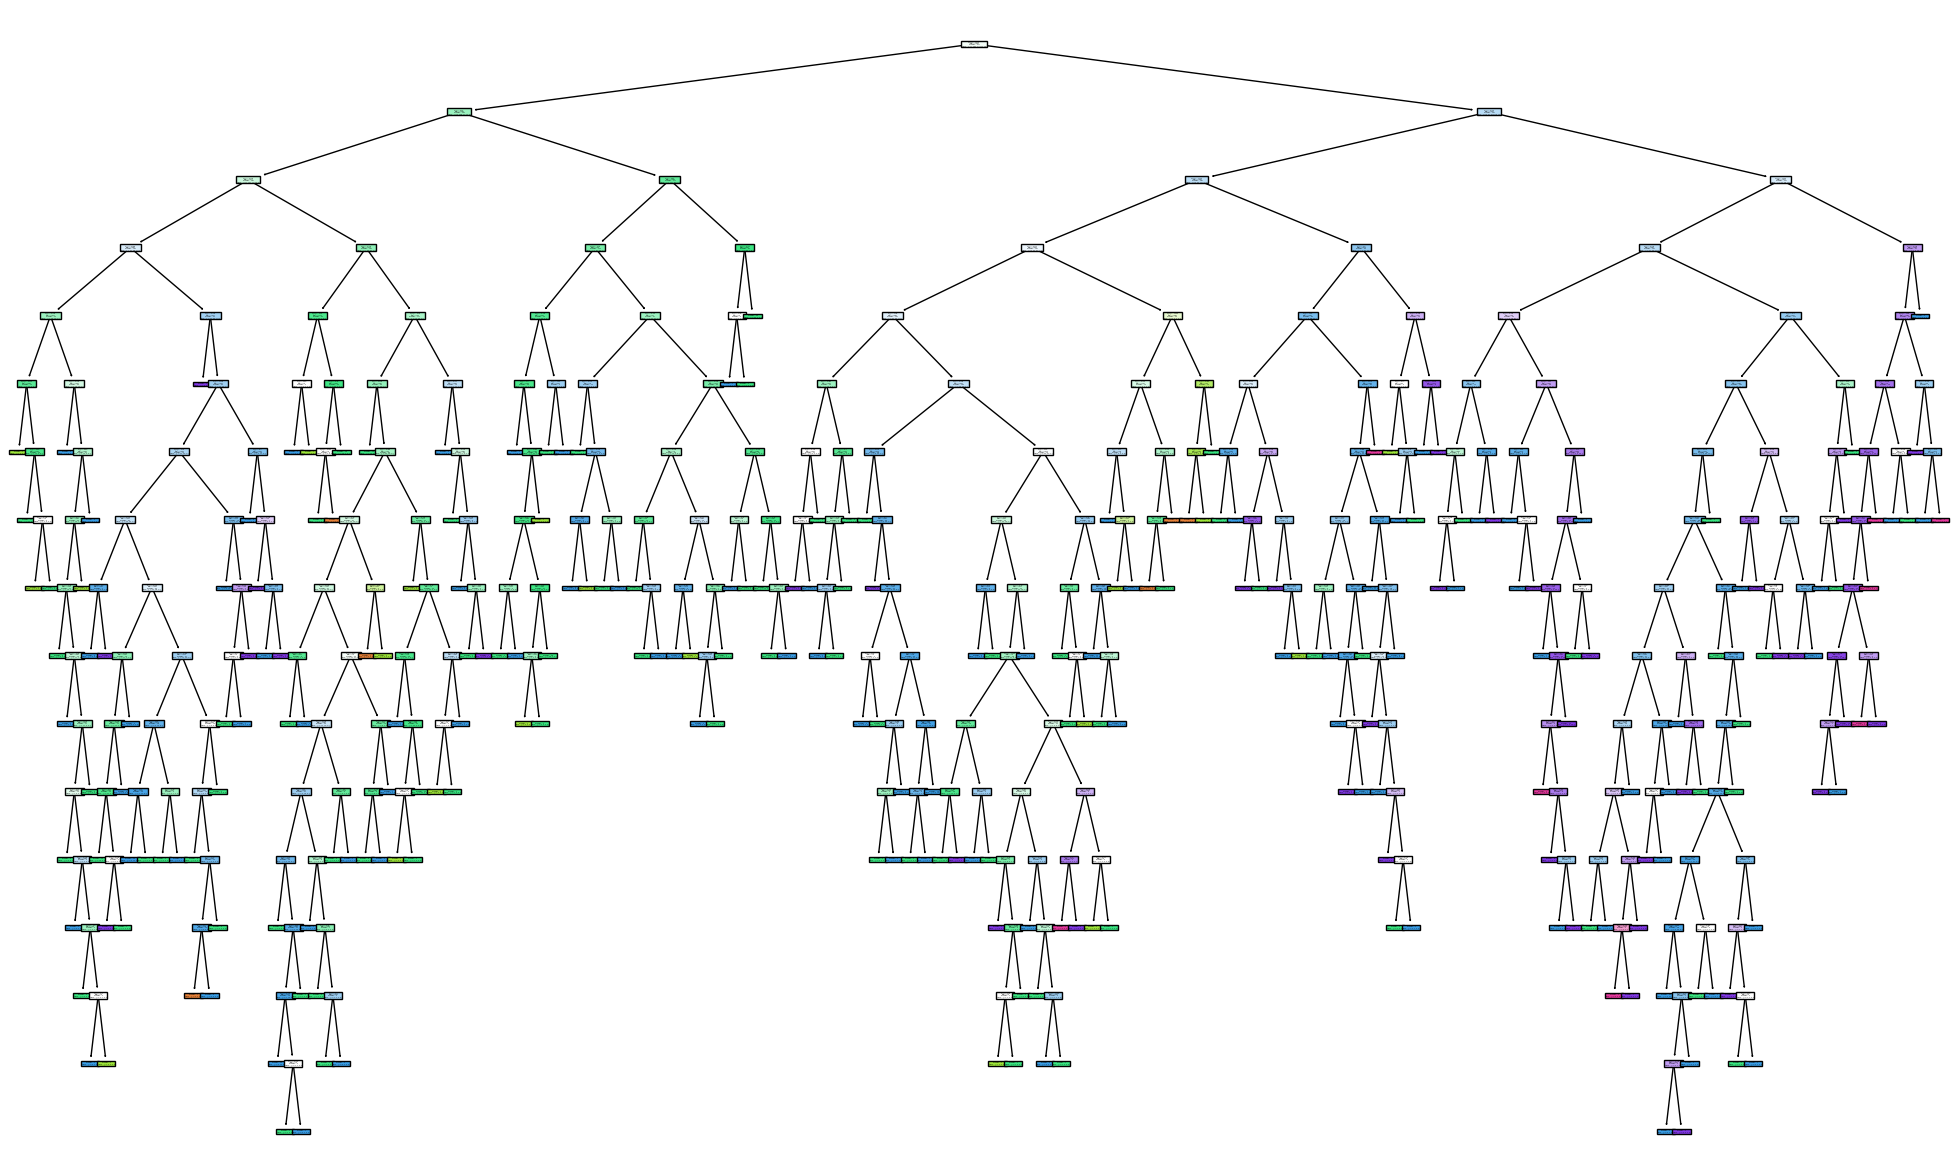

In [31]:
from sklearn import tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,filled=True)

In [33]:
fig.savefig("decision_tree.png")

[Text(0.5219298245614035, 0.9166666666666666, 'X[10] <= 10.15\ngini = 0.645\nsamples = 910\nvalue = [7, 31, 389, 359, 114, 10]'),
 Text(0.27631578947368424, 0.75, 'X[6] <= 62.5\ngini = 0.495\nsamples = 459\nvalue = [3, 15, 298, 131, 12, 0]'),
 Text(0.14035087719298245, 0.5833333333333334, 'X[1] <= 0.548\ngini = 0.571\nsamples = 282\nvalue = [3, 11, 151, 105, 12, 0]'),
 Text(0.07017543859649122, 0.4166666666666667, 'X[9] <= 0.585\ngini = 0.596\nsamples = 136\nvalue = [1, 4, 52, 68, 11, 0]'),
 Text(0.03508771929824561, 0.25, 'X[7] <= 0.996\ngini = 0.512\nsamples = 44\nvalue = [0, 4, 28, 12, 0, 0]'),
 Text(0.017543859649122806, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.05263157894736842, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.10526315789473684, 0.25, 'X[7] <= 0.996\ngini = 0.547\nsamples = 92\nvalue = [1, 0, 24, 56, 11, 0]'),
 Text(0.08771929824561403, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.12280701754385964, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.210526315789

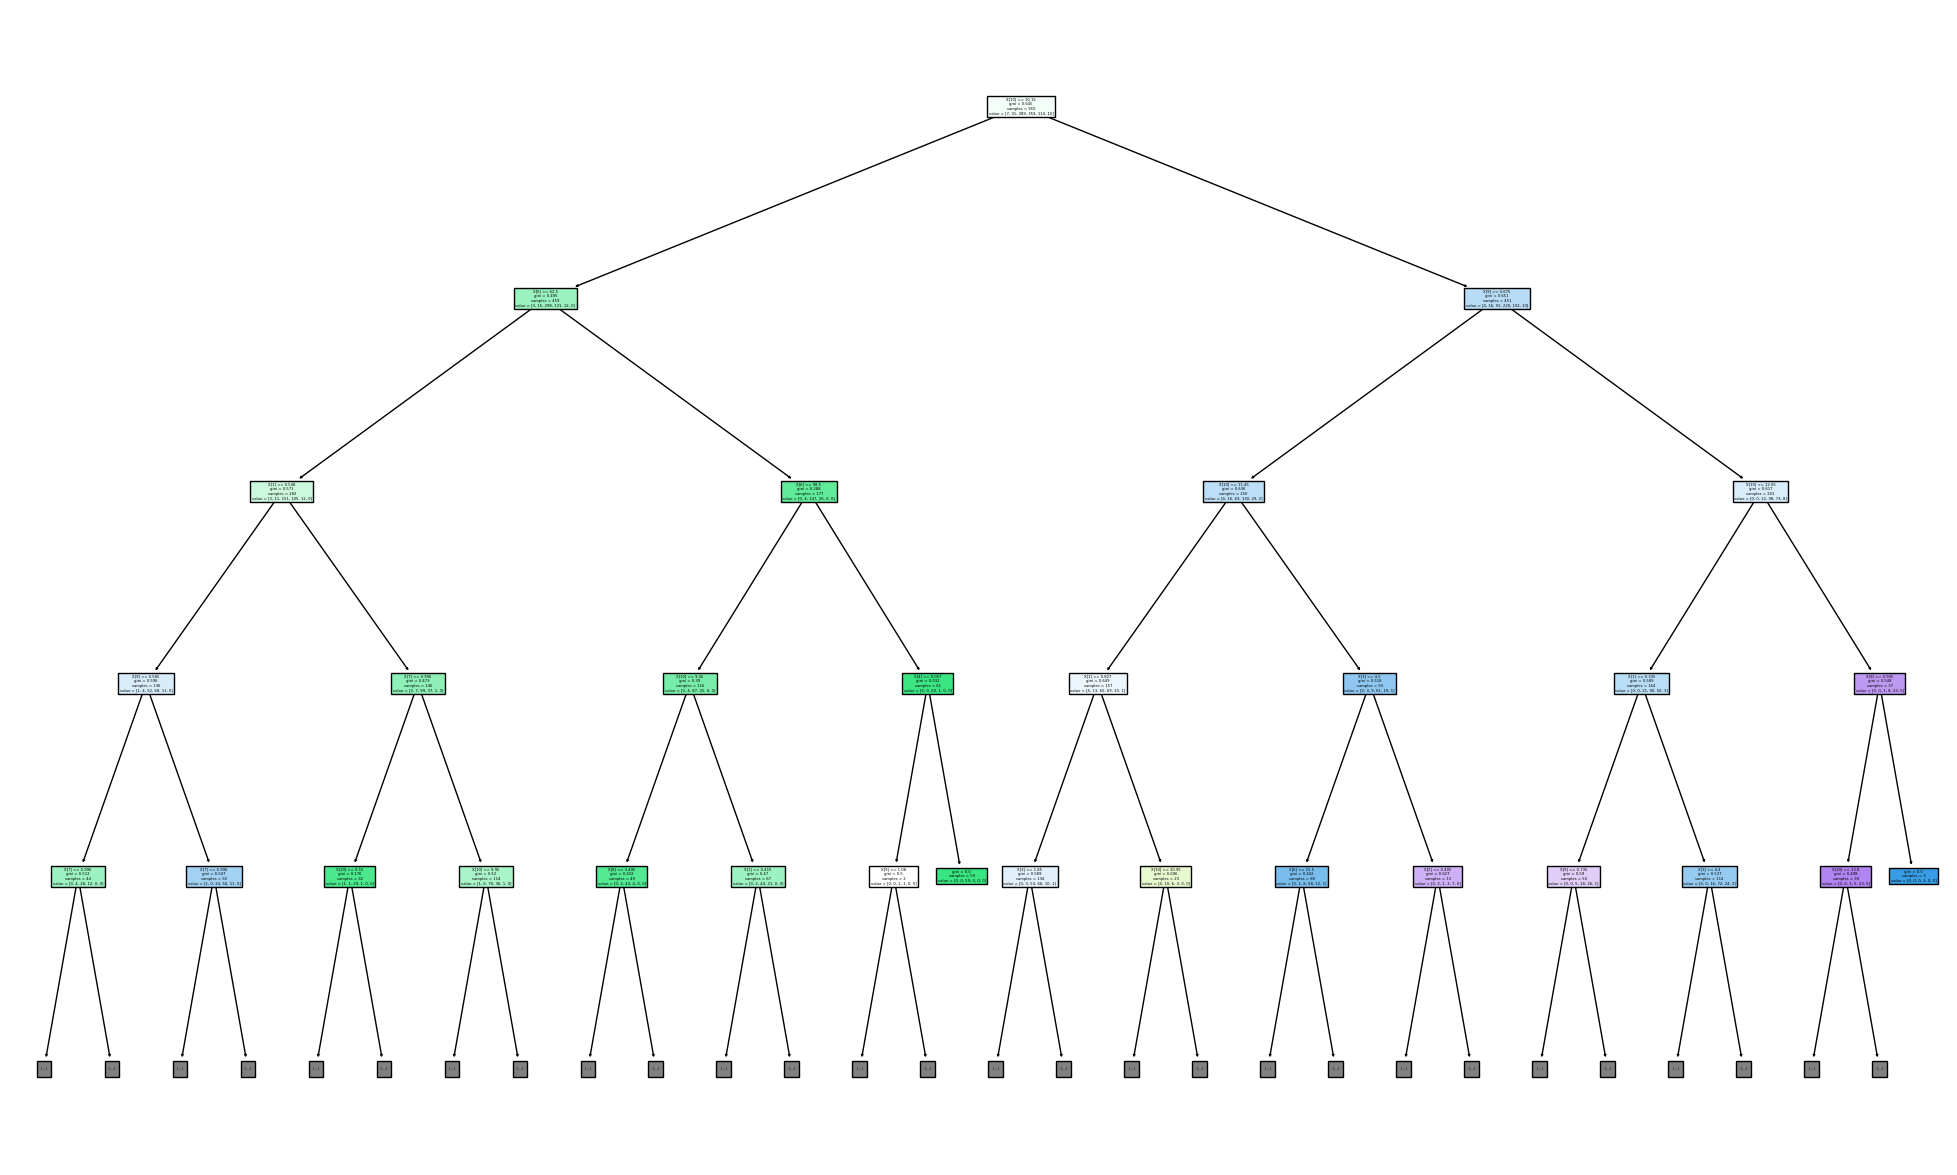

In [34]:
fig = plt.figure(figsize=(25,15))
tree.plot_tree(model,max_depth=4,filled=True)

In [32]:
# Logistic Regression,SVM, going forward (RF,XB,GB,AB)